# Stable Diffusion XL (SDXL)

In [1]:
from diffusers import DiffusionPipeline
import torch
#import diffusers
#diffusers.utils.logging.disable_progress_bar()

base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, 
    variant="fp16", use_safetensors=True) #.to("cuda")
base.enable_model_cpu_offload()

refiner = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2, vae=base.vae, torch_dtype=torch.float16,
    use_safetensors=True, variant="fp16")  #.to("cuda")
refiner.enable_model_cpu_offload()

i:\Miniconda3\envs\vc2024\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
i:\Miniconda3\envs\vc2024\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

i:\Miniconda3\envs\vc2024\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/8 [00:00<?, ?it/s]

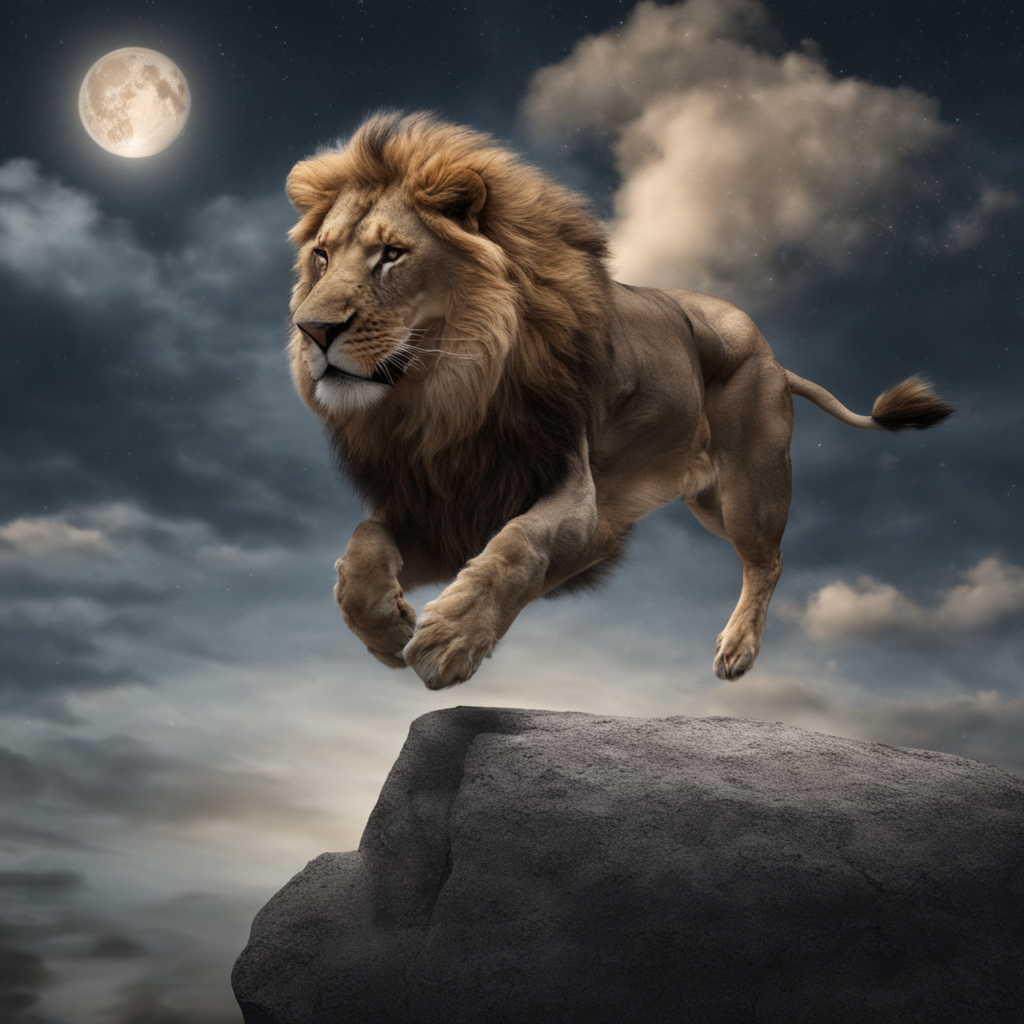

In [2]:
generator = torch.Generator(device="cpu").manual_seed(0)

prompt = "A majestic lion jumping from a big stone at night"

image = base(
    prompt=prompt,
    num_inference_steps=40,
    denoising_end=0.8,
    output_type="latent", generator=generator
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=40,
    denoising_start=0.8,
    image=image, generator=generator
).images[0]
image


  0%|          | 0/40 [00:00<?, ?it/s]

i:\Miniconda3\envs\vc2024\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


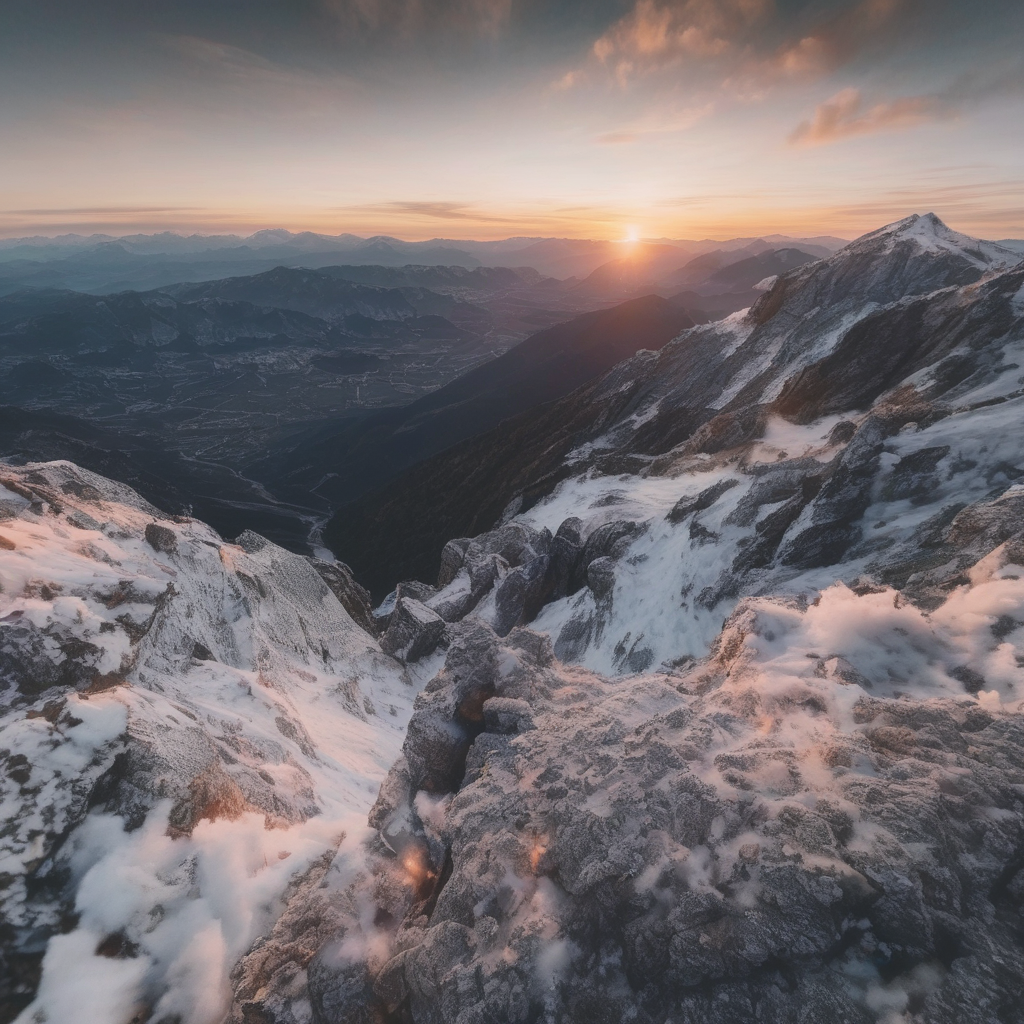

In [2]:
from diffusers import AutoPipelineForImage2Image

refiner_i2i = AutoPipelineForImage2Image.from_pipe(refiner)
refiner_i2i.enable_model_cpu_offload()

generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "An amazing view on top of a mountain"

image = base(
    prompt=prompt,
    num_inference_steps=40,
    generator=generator
).images[0]
image

  0%|          | 0/28 [00:00<?, ?it/s]

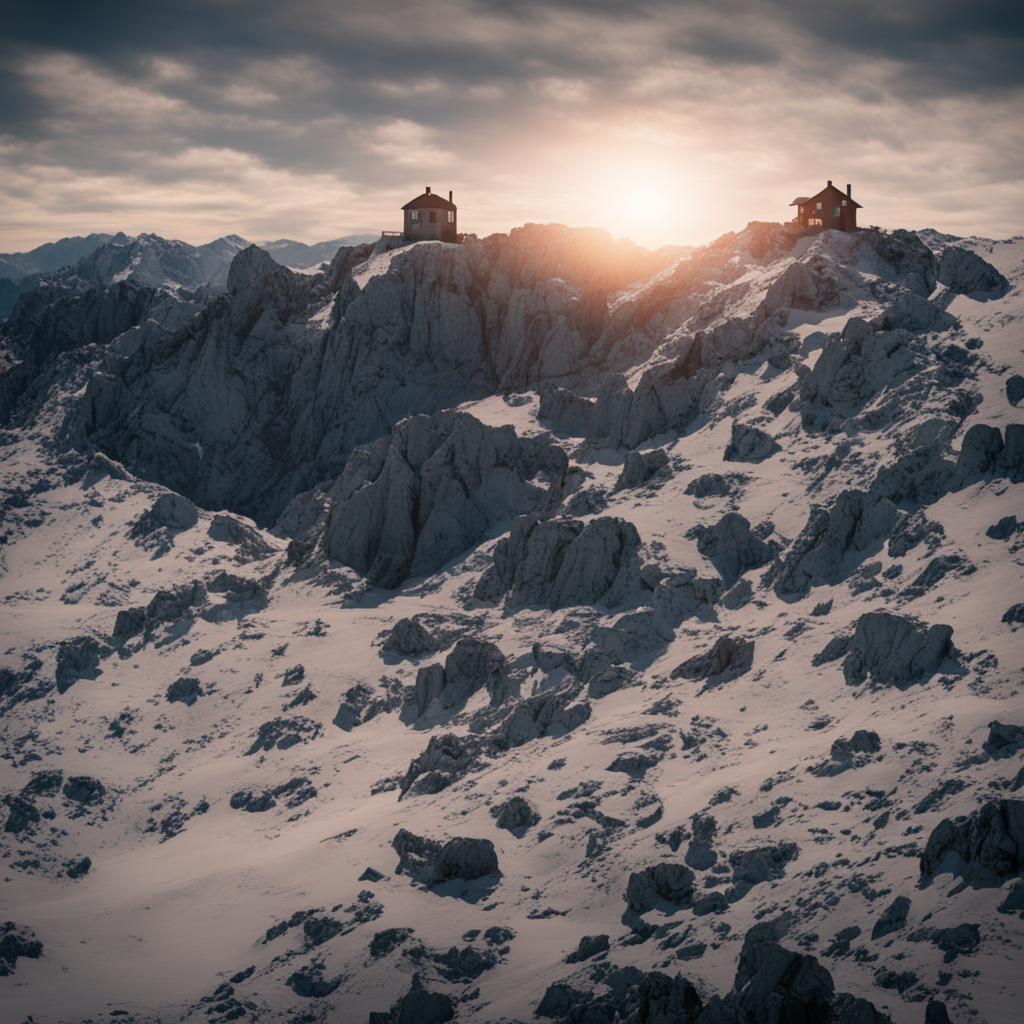

In [13]:
generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "A house is on top of the mountain"

image_ref = refiner_i2i(
    prompt=prompt,
    image=image,
    num_inference_steps=40,
    strength=0.7,   # quanto de ruído adicionar para gerar a nova imagem
    generator=generator
).images[0]
image_ref